In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import klib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
sns.set()

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def data_split(df):
    train_set, test_set = train_test_split(df, test_size=0.33, random_state=42)
    return train_set, test_set

In [7]:
titanic_train, titanic_test = data_split(titanic)
titanic_train = titanic_train.copy()
titanic_test = titanic_test.copy()

In [8]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Survived     596 non-null    int64  
 2   Pclass       596 non-null    int64  
 3   Name         596 non-null    object 
 4   Sex          596 non-null    object 
 5   Age          478 non-null    float64
 6   SibSp        596 non-null    int64  
 7   Parch        596 non-null    int64  
 8   Ticket       596 non-null    object 
 9   Fare         596 non-null    float64
 10  Cabin        134 non-null    object 
 11  E mbarked    595 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          462
E mbarked        1
dtype: int64

In [10]:
titanic_train.shape

(596, 12)

In [11]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

GridSpec(6, 6)

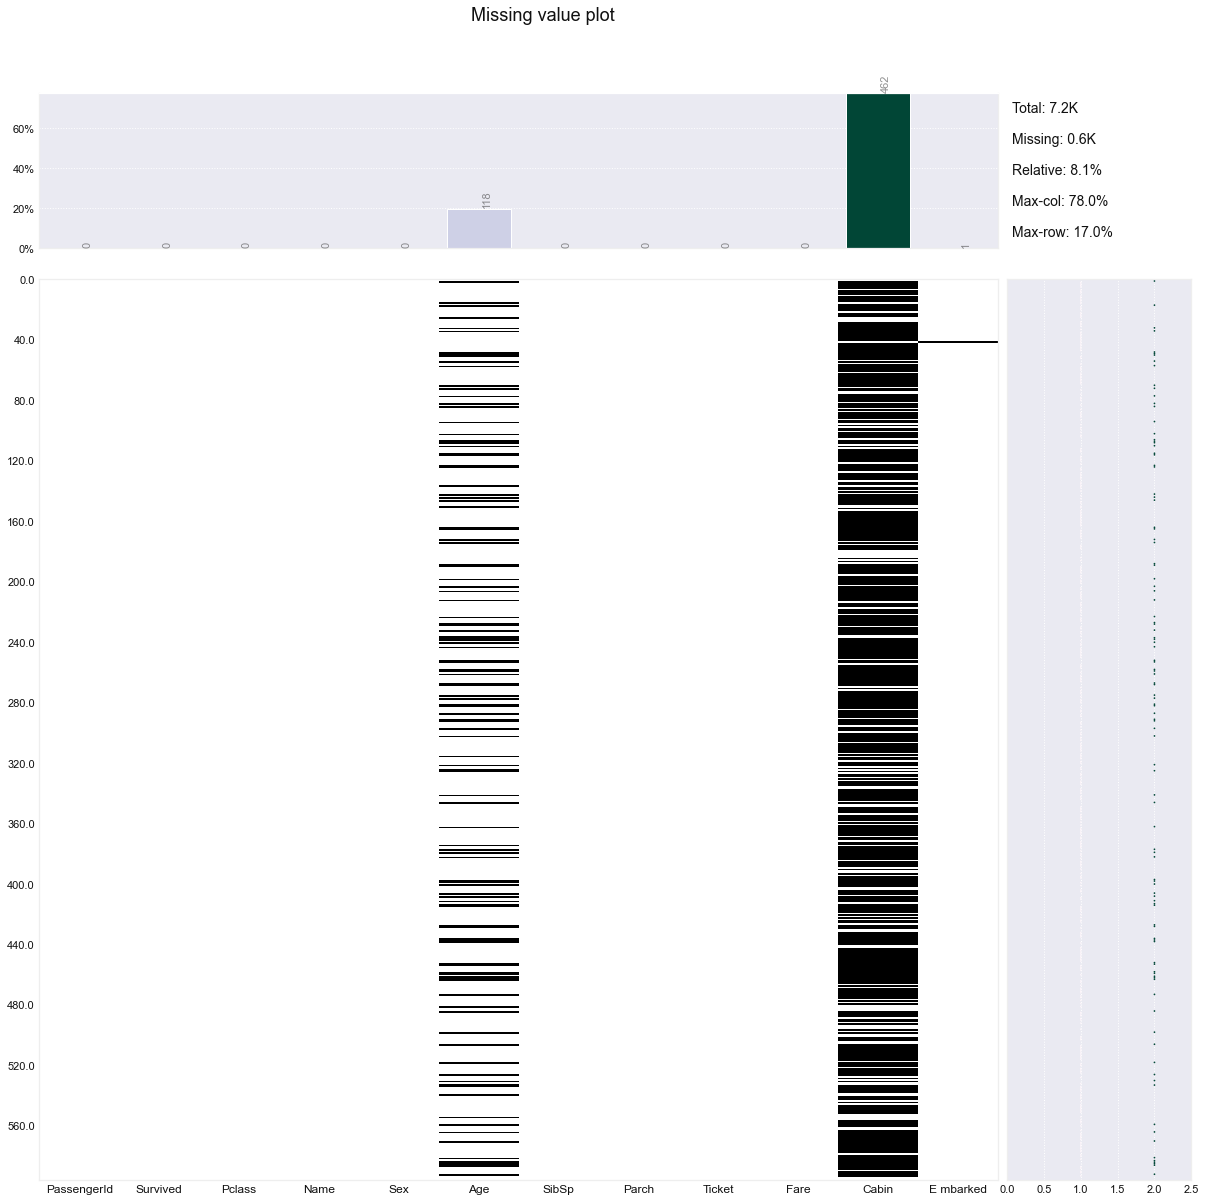

In [13]:
klib.missingval_plot(titanic_train)

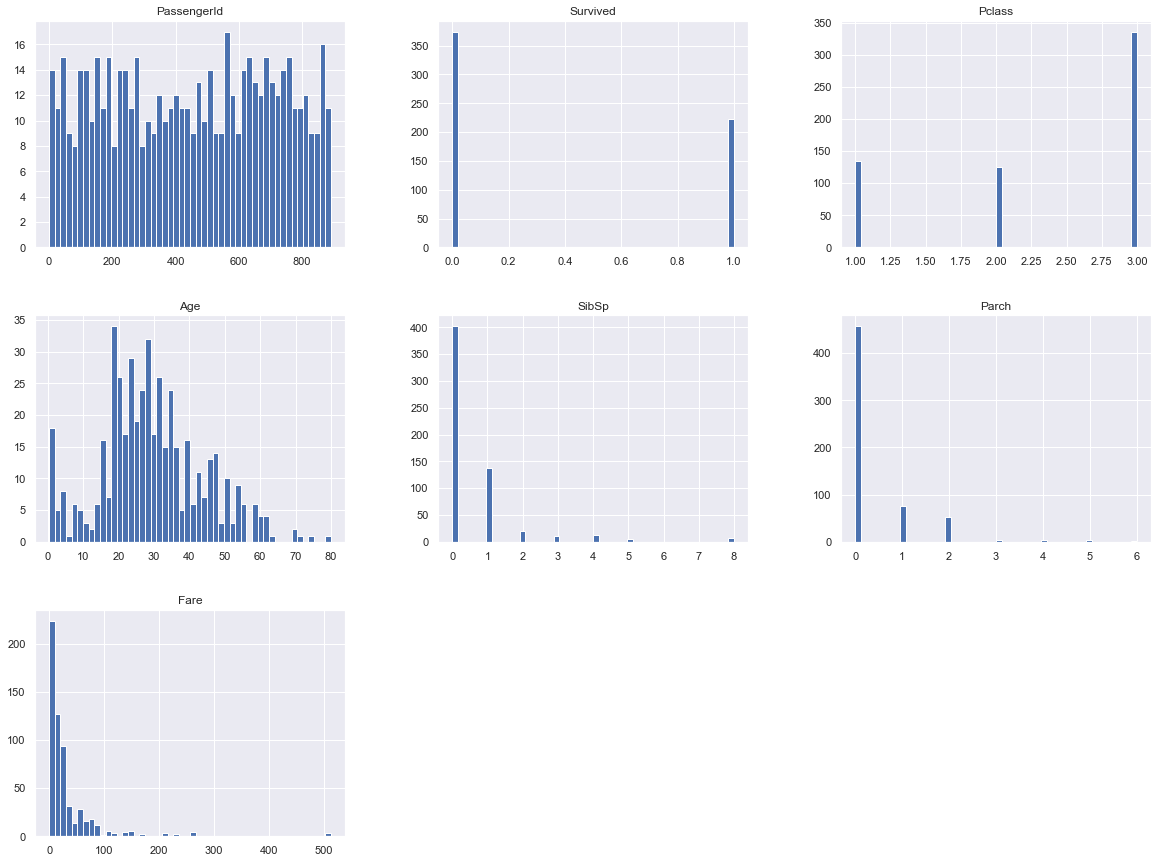

In [14]:
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

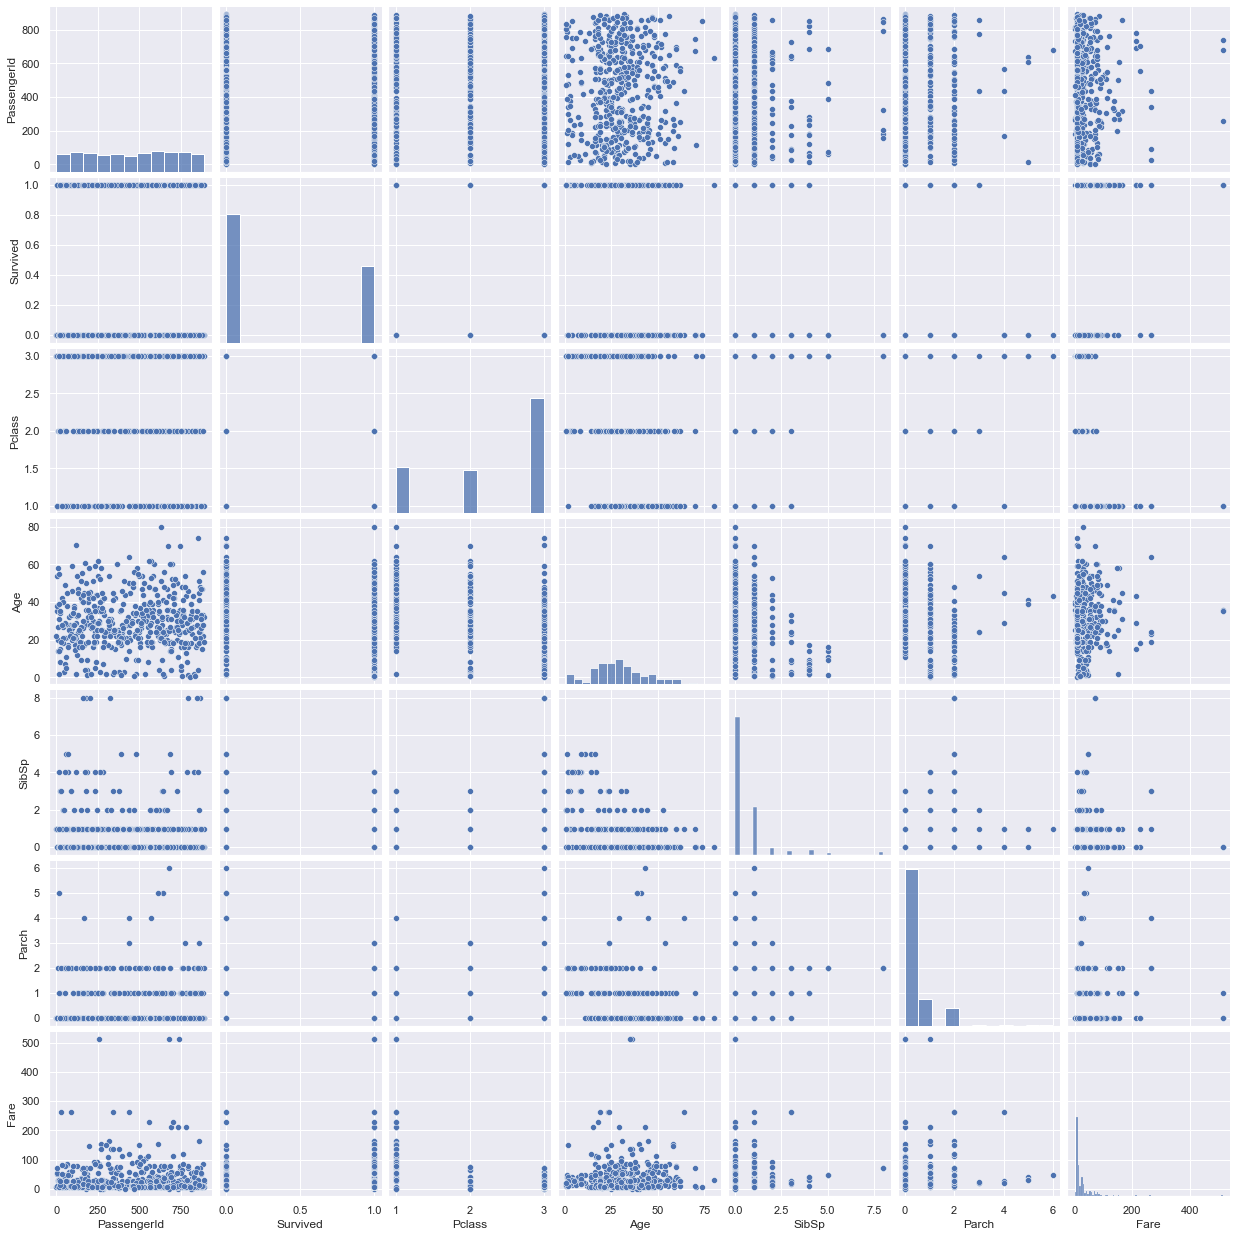

In [15]:
sns.pairplot(titanic_train)

In [16]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

In [17]:
titanic_train.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked
6,0,1,male,54.0,0,0,51.8625,S
718,0,3,male,NaN,0,0,15.5000,Q
685,0,2,male,25.0,1,2,41.5792,C
73,0,3,male,26.0,1,0,14.4542,C
882,0,3,female,22.0,0,0,10.5167,S
...,...,...,...,...,...,...,...,...
106,1,3,female,21.0,0,0,7.6500,S
270,0,1,male,NaN,0,0,31.0000,S
860,0,3,male,41.0,2,0,14.1083,S
435,1,1,female,14.0,1,2,120.0000,S


In [18]:
total_males = titanic_train.groupby('Sex').count()['Survived']['male']
total_females = titanic_train.groupby('Sex').count()['Survived']['female']

print('Total Number of Males : ', total_males)
print('Total Number of Females : ', total_females)

total_males_survived = titanic_train.groupby('Sex').sum()['Survived']['male']
total_females_survived = titanic_train.groupby('Sex').sum()['Survived']['female']

print('Total Number of Males Survived : ', total_males_survived)
print('Total Number of Females Survived : ', total_females_survived)

percent_of_survived_males = (total_males_survived / total_males) * 100
percent_of_survived_females = (total_females_survived / total_females) * 100

print('Percentage of Survived Males : {:.2f}%'.format(percent_of_survived_males))
print('Percentage of Survived Females : {:.2f}%'.format(percent_of_survived_females))

Total Number of Males :  390
Total Number of Females :  206
Total Number of Males Survived :  73
Total Number of Females Survived :  149
Percentage of Survived Males : 18.72%
Percentage of Survived Females : 72.33%


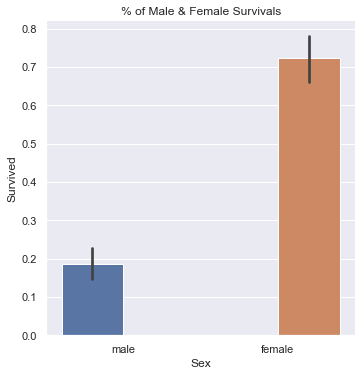

In [19]:
sns.catplot(data=titanic_train, x='Sex', y='Survived', hue='Sex', kind='bar').set(title='% of Male & Female Survivals')
plt.show()

In [20]:
total_class_1_passenger = titanic_train.groupby('Pclass').count()['Survived'][1]
total_class_2_passenger = titanic_train.groupby('Pclass').count()['Survived'][2]
total_class_3_passenger = titanic_train.groupby('Pclass').count()['Survived'][3]

print('Total Number of Class 1 Passenger : ', total_class_1_passenger)
print('Total Number of Class 2 Passenger : ', total_class_2_passenger)
print('Total Number of Class 3 Passenger : ', total_class_3_passenger)

total_class1_survived = titanic_train.groupby('Pclass').sum()['Survived'][1]
total_class2_survived = titanic_train.groupby('Pclass').sum()['Survived'][2]
total_class3_survived = titanic_train.groupby('Pclass').sum()['Survived'][3]

print('Total Number of Class 1 Passenger Survived : ', total_class1_survived)
print('Total Number of Class 2 Passenger Survived : ', total_class2_survived)
print('Total Number of Class 3 Passenger Survived : ', total_class3_survived)

percent_of_class1_survived = (total_class1_survived / total_class_1_passenger) * 100
percent_of_class2_survived = (total_class2_survived / total_class_2_passenger) * 100
percent_of_class3_survived = (total_class3_survived / total_class_3_passenger) * 100

print('Percentage of Class 1 Passenger Survived : {:.2f}%'.format(percent_of_class1_survived))
print('Percentage of Class 2 Passenger Survived : {:.2f}%'.format(percent_of_class2_survived))
print('Percentage of Class 3 Passenger Survived : {:.2f}%'.format(percent_of_class3_survived))

Total Number of Class 1 Passenger :  135
Total Number of Class 2 Passenger :  125
Total Number of Class 3 Passenger :  336
Total Number of Class 1 Passenger Survived :  80
Total Number of Class 2 Passenger Survived :  61
Total Number of Class 3 Passenger Survived :  81
Percentage of Class 1 Passenger Survived : 59.26%
Percentage of Class 2 Passenger Survived : 48.80%
Percentage of Class 3 Passenger Survived : 24.11%


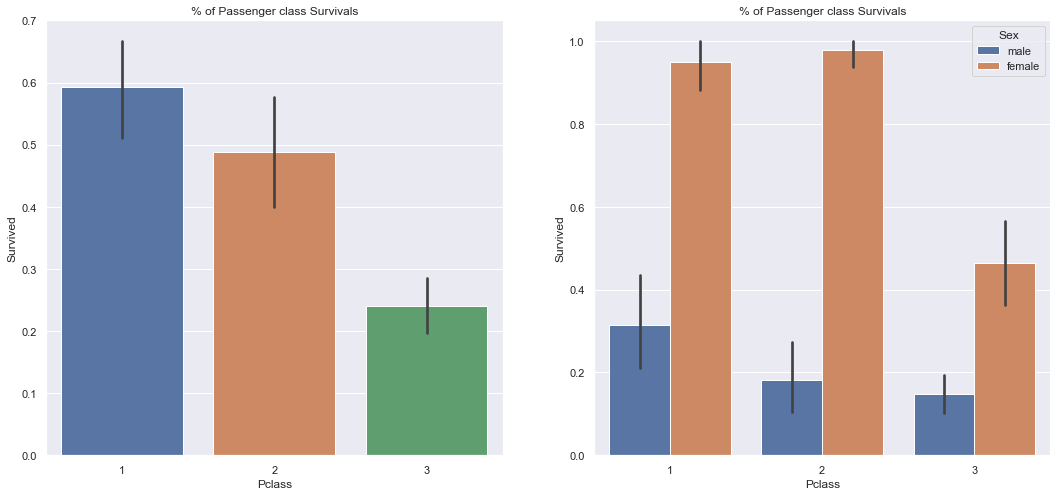

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=titanic_train, x='Pclass', y='Survived', ax=axes[0]).set(title='% of Passenger class Survivals')
sns.barplot(data=titanic_train, x='Pclass', y='Survived', hue='Sex', ax=axes[1]).set(title='% of Passenger class Survivals')
plt.show()

In [22]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'E mbarked'],
      dtype='object')

In [23]:
titanic_train['Age'].dtype

dtype('float64')

In [24]:
titanic_train['age_category'] = pd.cut(titanic_train['Age'], bins=[0, 18, 30, 60, 100, np.inf]) 
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked,age_category
6,0,1,male,54.0,0,0,51.8625,S,"(30.0, 60.0]"
718,0,3,male,NaN,0,0,15.5000,Q,NaN
685,0,2,male,25.0,1,2,41.5792,C,"(18.0, 30.0]"
73,0,3,male,26.0,1,0,14.4542,C,"(18.0, 30.0]"
882,0,3,female,22.0,0,0,10.5167,S,"(18.0, 30.0]"
...,...,...,...,...,...,...,...,...,...
106,1,3,female,21.0,0,0,7.6500,S,"(18.0, 30.0]"
270,0,1,male,NaN,0,0,31.0000,S,NaN
860,0,3,male,41.0,2,0,14.1083,S,"(30.0, 60.0]"
435,1,1,female,14.0,1,2,120.0000,S,"(0.0, 18.0]"


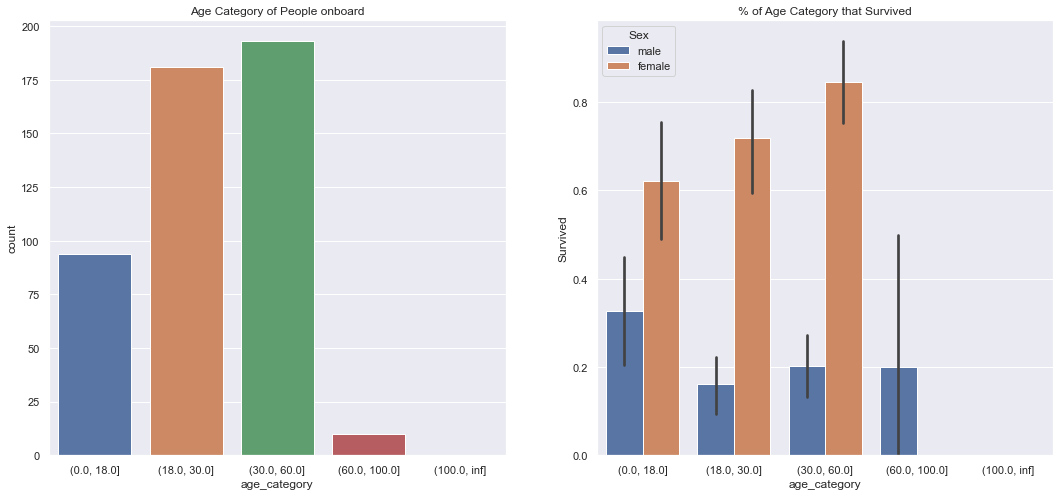

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='age_category', data=titanic_train, ax=axes[0]).set(title='Age Category of People onboard')
sns.barplot(x='age_category', y='Survived', hue='Sex', data=titanic_train,ax=axes[1]).set(title='% of Age Category that Survived')

plt.show()

[Text(0.5, 1.0, 'Number of Parent Child that survived')]

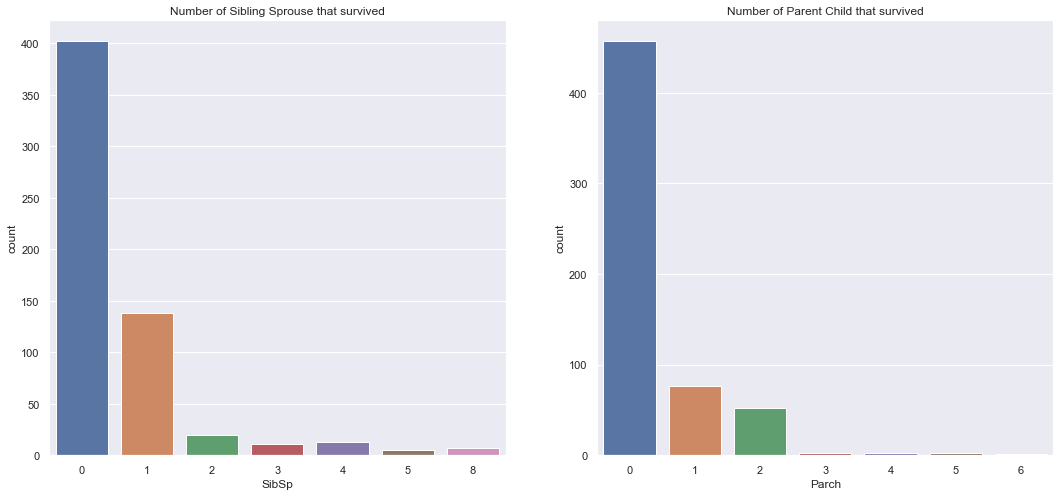

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='SibSp', data=titanic_train, ax=axes[0]).set(title='Number of Sibling Sprouse that survived')
sns.countplot(x='Parch', data=titanic_train, ax=axes[1]).set(title='Number of Parent Child that survived')


In [27]:
klib.corr_mat(data=titanic_train)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.31,-0.06,-0.05,0.07,0.24
Pclass,-0.31,1.00,-0.36,0.10,0.04,-0.52
Age,-0.06,-0.36,1.00,-0.32,-0.18,0.09
SibSp,-0.05,0.10,-0.32,1.00,0.45,0.16
Parch,0.07,0.04,-0.18,0.45,1.00,0.21
Fare,0.24,-0.52,0.09,0.16,0.21,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

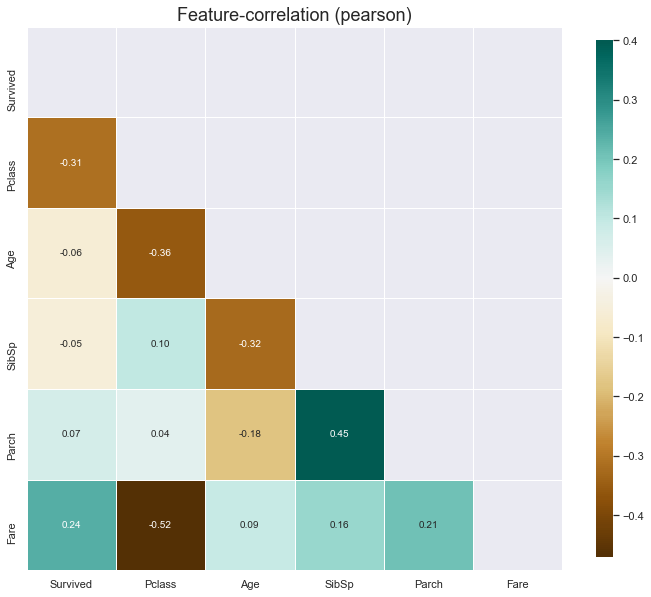

In [28]:
klib.corr_plot(data=titanic_train)

In [29]:
titanic_train.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.237079
Parch       0.068585
SibSp      -0.054055
Age        -0.061776
Pclass     -0.311678
Name: Survived, dtype: float64

In [30]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,E mbarked,age_category
6,0,1,male,54.0,0,0,51.8625,S,"(30.0, 60.0]"
718,0,3,male,NaN,0,0,15.5000,Q,NaN
685,0,2,male,25.0,1,2,41.5792,C,"(18.0, 30.0]"
73,0,3,male,26.0,1,0,14.4542,C,"(18.0, 30.0]"
882,0,3,female,22.0,0,0,10.5167,S,"(18.0, 30.0]"


In [31]:
titanic_train.dtypes

Survived           int64
Pclass             int64
Sex               object
Age              float64
SibSp              int64
Parch              int64
Fare             float64
E mbarked         object
age_category    category
dtype: object

In [32]:
feature_data = titanic_train.drop(['Survived', 'age_category'], axis=1)
labels = titanic_train['Survived']

In [33]:
numerical_index = feature_data.columns[(feature_data.dtypes == 'int64') | (feature_data.dtypes == 'float64')]
numerical_index

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [34]:
categorical_index = list(set(feature_data.columns) - set(numerical_index))
categorical_index

['Sex', 'E mbarked']

In [35]:
imputer = SimpleImputer(strategy='median')

In [36]:
feature_data[numerical_index].isnull().sum()

Pclass      0
Age       118
SibSp       0
Parch       0
Fare        0
dtype: int64

In [37]:
cleaned_features = imputer.fit_transform(feature_data[numerical_index])
cleaned_features

array([[  1.    ,  54.    ,   0.    ,   0.    ,  51.8625],
       [  3.    ,  28.    ,   0.    ,   0.    ,  15.5   ],
       [  2.    ,  25.    ,   1.    ,   2.    ,  41.5792],
       ...,
       [  3.    ,  41.    ,   2.    ,   0.    ,  14.1083],
       [  1.    ,  14.    ,   1.    ,   2.    , 120.    ],
       [  1.    ,  21.    ,   0.    ,   1.    ,  77.2875]])

In [38]:
np.sum(np.isnan(cleaned_features), axis=0)

array([0, 0, 0, 0, 0])

In [39]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(cleaned_features)
scaled_data

array([[-1.62580285,  1.91349292, -0.46983664, -0.46399264,  0.38784185],
       [ 0.80576177, -0.09452019, -0.46983664, -0.46399264, -0.31908053],
       [-0.41002054, -0.32621401,  0.34418265,  2.01618328,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636,  1.15820195, -0.46399264, -0.34613654],
       [-1.62580285, -1.17575802,  0.34418265,  2.01618328,  1.71250117],
       [-1.62580285, -0.63513911, -0.46983664,  0.77609532,  0.8821286 ]])

In [40]:
cat_encoder = OneHotEncoder()

In [41]:
cat_data = cat_encoder.fit_transform(feature_data[categorical_index])

In [42]:
cat_data.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [43]:
np.shape(scaled_data), np.shape(cat_data.toarray())

((596, 5), (596, 6))

In [49]:
final_data = np.c_[scaled_data, cat_data.toarray()]
final_data

array([[-1.62580285,  1.91349292, -0.46983664, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.80576177, -0.09452019, -0.46983664, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41002054, -0.32621401,  0.34418265, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.80576177,  0.90948636,  1.15820195, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62580285, -1.17575802,  0.34418265, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62580285, -0.63513911, -0.46983664, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
labels

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [51]:
tree = DecisionTreeClassifier()

In [52]:
tree.fit(final_data, labels)

DecisionTreeClassifier()

In [53]:
print('Training Score is {:.2f}%'.format(tree.score(final_data, labels) * 100))

Training Score is 97.99%


In [54]:
cross_val_score(estimator=tree, X=final_data, y=labels, cv=5, n_jobs=-1)

array([0.74166667, 0.73109244, 0.74789916, 0.76470588, 0.7394958 ])

In [55]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,40,1),
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'splitter' : ['best', 'random']
}

In [56]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1)

In [57]:
grid_search.fit(final_data, labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [58]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=3,
                       splitter='random')

In [59]:
best_tree = grid_search.best_estimator_
best_tree.fit(final_data, labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=3,
                       splitter='random')

In [60]:
best_tree.score(final_data, labels)

0.8338926174496645

In [61]:
cross_val_score(estimator=best_tree, X=final_data, y=labels, cv=5, n_jobs=-1)

array([0.79166667, 0.84033613, 0.82352941, 0.78151261, 0.83193277])

In [62]:
predicted_value = best_tree.predict(final_data)
print(metrics.classification_report(y_true=labels, y_pred=predicted_value))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       374
           1       0.89      0.63      0.74       222

    accuracy                           0.83       596
   macro avg       0.85      0.79      0.81       596
weighted avg       0.84      0.83      0.83       596



In [63]:
print(metrics.confusion_matrix(y_true=labels, y_pred=predicted_value))

[[357  17]
 [ 82 140]]


In [58]:
joblib.dump(best_tree, 'best_tree.pkl')

['best_tree.pkl']